In [5]:
from tools.tools_database import *

Dataset = Read_data('./Data/TGV.csv')

map_ = Display_network(Dataset)

map_

/home/agitated_curran/workdir/Machine Learning/My_projects/prediction-de-retards-tgv-td3-groupe-1/tools/tools_database.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(Dataset[Dataset['gare_depart']==S[i]][Dataset['gare_arrivee']==S[j]]) or  len(Dataset[Dataset['gare_depart']==S[j]][Dataset['gare_arrivee']==S[i]]):


In [6]:
map_ = Display_map_delays(Dataset, column='delay')

map_

In [7]:
map_ = Display_map_delays(Dataset, column='nb_train_retard_arrivee')

map_

/home/agitated_curran/workdir/Machine Learning/My_projects/prediction-de-retards-tgv-td3-groupe-1/tools/tools_database.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(Dataset[Dataset['gare_depart']==S[i]][Dataset['gare_arrivee']==S[j]]) or  len(Dataset[Dataset['gare_depart']==S[j]][Dataset['gare_arrivee']==S[i]]):


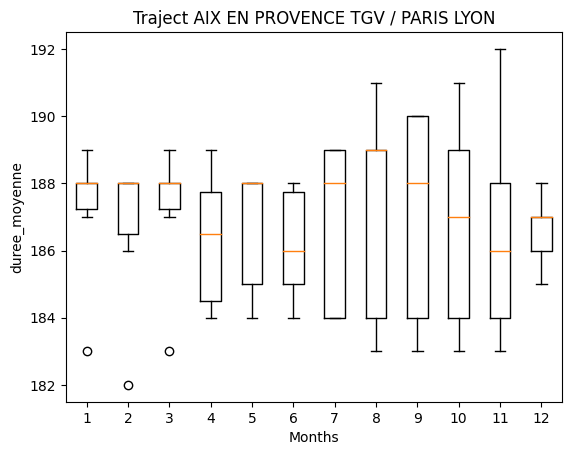

In [11]:
A = np.unique(Dataset['gare_depart'])

station_coordinates = Load_coords()
Net = Build_network(station_coordinates, Dataset, A)

for i in range(len(A)) :
    for j in range(len(A)) :
        if i!=j and Net[i, j] :
            Box_plot_months(Dataset, A[i], A[j], 'duree_moyenne')
            break
    break

In [12]:
Dataset.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs'],
      dtype='object')

In [19]:
A

array(['AIX EN PROVENCE TGV', 'ANGERS SAINT LAUD', 'ANGOULEME', 'ANNECY',
       'ARRAS', 'AVIGNON TGV', 'BARCELONA', 'BELLEGARDE (AIN)',
       'BESANCON FRANCHE COMTE TGV', 'BORDEAUX ST JEAN', 'BREST',
       'CHAMBERY CHALLES LES EAUX', 'DIJON VILLE', 'DOUAI', 'DUNKERQUE',
       'FRANCFORT', 'GENEVE', 'GRENOBLE', 'ITALIE', 'LA ROCHELLE VILLE',
       'LAUSANNE', 'LAVAL', 'LE CREUSOT MONTCEAU MONTCHANIN', 'LE MANS',
       'LILLE', 'LYON PART DIEU', 'MACON LOCHE', 'MADRID',
       'MARNE LA VALLEE', 'MARSEILLE ST CHARLES', 'METZ', 'MONTPELLIER',
       'MULHOUSE VILLE', 'NANCY', 'NANTES', 'NICE VILLE', 'NIMES',
       'PARIS EST', 'PARIS LYON', 'PARIS MONTPARNASSE', 'PARIS NORD',
       'PARIS VAUGIRARD', 'PERPIGNAN', 'POITIERS', 'QUIMPER', 'REIMS',
       'RENNES', 'SAINT ETIENNE CHATEAUCREUX', 'ST MALO',
       'ST PIERRE DES CORPS', 'STRASBOURG', 'STUTTGART', 'TOULON',
       'TOULOUSE MATABIAU', 'TOURCOING', 'TOURS', 'VALENCE ALIXAN TGV',
       'VANNES', 'ZURICH'], dtype=object

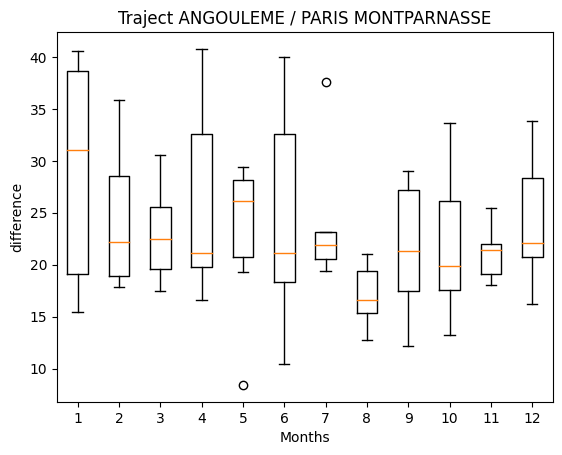

In [18]:
Dataset['difference'] = Dataset['retard_moyen_arrivee'] - Dataset['retard_moyen_depart']


for i in range(2, len(A)) :
    for j in range(len(A)) :
        if i!=j and Net[i, j] :
            Box_plot_months(Dataset, A[i], A[j], 'difference')
            
    break